PART A: Initialization of the Data Analysis Process

In [1]:
# Import necessary libraries for data manipulation, statistical modeling, text processing, plotting, and machine learning models
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import statsmodels.api as sm  # For statistical models and tests
import unicodedata  # For Unicode character database
import jieba  # For Chinese text segmentation
import re  # For regular expression operations
import json  # For JSON manipulation
import matplotlib.pyplot as plt  # For plotting and visualization
from sklearn.metrics import mean_squared_error, mean_absolute_error  # For evaluation metrics
from sklearn.svm import SVR  # For Support Vector Regressor model
from sklearn.ensemble import RandomForestRegressor  # For Random Forest Regressor model
from sklearn.linear_model import LinearRegression, Lasso, Ridge  # For linear models
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning
from sklearn.pipeline import make_pipeline  # For creating machine learning pipelines
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For calculating Variance Inflation Factor (VIF)
from xgboost import XGBRegressor  # For XGBoost Regressor model


PART B: Initial Exploratory Data Analysis of the Textual Dataset 

In [2]:
# Read the Scrapped CSV file 
encodings = ['utf-8', 'gb18030', 'big5']
for encoding in encodings:
    try:
        scrapped_df = pd.read_csv('Scrapped (See Hua).csv', encoding=encoding)
        print(f"Successfully read the file with encoding: {encoding}")
        break
    except Exception as e:
        print(f"Failed to read the file with encoding: {encoding}")
        print(f"Error: {e}")

Successfully read the file with encoding: utf-8


In [3]:
# Perform Exploratory Data Analysis (EDA) on the scrapped data
# Display the first few rows
print("First few rows of the dataset:")
print(scrapped_df.head())

First few rows of the dataset:
                 article_name                          article_url  \
0         全球富豪身价狂涨 中国富人财产反而缩水  https://news.seehua.com/post/787364   
1       开市即迎来套利压力　马股早盘跌18.85点  https://news.seehua.com/post/788101   
2  2022首个交易日出师不利　马股全天下滑18.48点  https://news.seehua.com/post/788243   
3      亚航拟改名为CAPITAL A BERHAD  https://news.seehua.com/post/788313   
4      与大市背道而驰　富时大马综合指数跌9.52点  https://news.seehua.com/post/788684   

  article_date                            article_article_content  
0    2022年1月1日  这2年在新冠病毒肆虐期间，全球富豪资产大幅增长，不过中国科技富豪资产大失血，根据彭博亿万富豪...  
1    2022年1月3日  （吉隆坡3日讯）2022年首个交易日，亚洲股市开盘表现普遍平平无奇，唯独马股出师不利，上周五...  
2    2022年1月3日  （吉隆坡3日讯）由于区域多个股市仍未开市，导致亚洲市场淡静。马股首个交易日出师不利，全天下滑...  
3    2022年1月3日  （吉隆坡3日讯）亚洲航空（AirAsia，5099，主板消费股）董事局建议将公司的名字改为C...  
4    2022年1月4日  （吉隆坡4日讯）美国隔夜股市上涨，带动亚洲股市周二升多跌少。不过，马股仍延续周一跌势，与大市...  


In [4]:
# Drop the 'article_url' column
scrapped_df = scrapped_df.drop(columns=['article_url'])

In [5]:
# Rename the columns
scrapped_df = scrapped_df.rename(columns={
    'article_name': 'Title',
    'article_date': 'Date',
    'article_article_content': 'Content'
})

In [6]:
# Rearrange the columns
scrapped_df = scrapped_df[['Date', 'Title', 'Content']]

In [7]:
# Save the modified DataFrame to a new CSV file with utf-8 encoding
scrapped_df.to_csv('See Hua (New).csv', index=False, encoding='utf-8')

In [8]:
# Read the now modified CSV file
encodings = ['utf-8', 'gb18030', 'big5']
for encoding in encodings:
    try:
        df = pd.read_csv('See Hua (New).csv', encoding=encoding)
        print(f"Successfully read the file with encoding: {encoding}")
        break
    except Exception as e:
        print(f"Failed to read the file with encoding: {encoding}")
        print(f"Error: {e}")

Successfully read the file with encoding: utf-8


In [9]:
# Perform Exploratory Data Analysis (EDA) on the data
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
        Date                       Title  \
0  2022年1月1日         全球富豪身价狂涨 中国富人财产反而缩水   
1  2022年1月3日       开市即迎来套利压力　马股早盘跌18.85点   
2  2022年1月3日  2022首个交易日出师不利　马股全天下滑18.48点   
3  2022年1月3日      亚航拟改名为CAPITAL A BERHAD   
4  2022年1月4日      与大市背道而驰　富时大马综合指数跌9.52点   

                                             Content  
0  这2年在新冠病毒肆虐期间，全球富豪资产大幅增长，不过中国科技富豪资产大失血，根据彭博亿万富豪...  
1  （吉隆坡3日讯）2022年首个交易日，亚洲股市开盘表现普遍平平无奇，唯独马股出师不利，上周五...  
2  （吉隆坡3日讯）由于区域多个股市仍未开市，导致亚洲市场淡静。马股首个交易日出师不利，全天下滑...  
3  （吉隆坡3日讯）亚洲航空（AirAsia，5099，主板消费股）董事局建议将公司的名字改为C...  
4  （吉隆坡4日讯）美国隔夜股市上涨，带动亚洲股市周二升多跌少。不过，马股仍延续周一跌势，与大市...  


In [10]:
# Display the summary of the DataFrame
print("\nSummary of the DataFrame:")
print(df.info())


Summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3361 entries, 0 to 3360
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     3361 non-null   object
 1   Title    3361 non-null   object
 2   Content  3361 non-null   object
dtypes: object(3)
memory usage: 78.9+ KB
None


In [11]:
# Display summary statistics of the DataFrame
print("\nSummary statistics:")
print(df.describe(include='all'))


Summary statistics:
              Date                  Title  \
count         3361                   3361   
unique         576                   3354   
top     2023年8月25日  次季业绩符预期 天地通数码实现3大财务目标   
freq            28                      2   

                                                  Content  
count                                                3361  
unique                                               3349  
top     （吉隆坡22日讯）美联储主席鲍威尔暗示5月再升息，加上美债收益率上涨导致美股承压，隔夜美股3...  
freq                                                    2  


PART C: Initial Exploratory Data Analysis of the Numerical Datasets

PART C(1): MIER Dataset 

In [12]:
# Load MIER BCI and CSI data from Excel
bci_df_eda = pd.read_excel('Data BCI_CSI_2022_2023.xlsx', sheet_name='BCI Formatted ')
csi_df_eda = pd.read_excel('Data BCI_CSI_2022_2023.xlsx', sheet_name='CSI Formatted')

In [13]:
# Perform EDA on the BCI data
print("\nFirst few rows of the BCI dataset:")
print(bci_df_eda.head())


First few rows of the BCI dataset:
  Quarter  BCI Values 
0  2022Q1        101.0
1  2022Q2         96.2
2  2022Q3         99.8
3  2022Q4         85.9
4  2023Q1         95.4


In [14]:
# Perform EDA on the CSI data
print("\nFirst few rows of the CSI dataset:")
print(csi_df_eda.head())


First few rows of the CSI dataset:
  Quarter  CSI Values 
0  2022Q1        108.9
1  2022Q2         86.0
2  2022Q3         98.4
3  2022Q4        105.3
4  2023Q1         99.2


In [15]:
# Display the summary statistics of the bci_df_eda DataFrame
print("\nSummary of the bci_df_eda DataFrame:")
print(bci_df_eda.info())


Summary of the bci_df_eda DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Quarter      8 non-null      object 
 1   BCI Values   8 non-null      float64
dtypes: float64(1), object(1)
memory usage: 260.0+ bytes
None


In [16]:
# Display the summary statistics of the csi_df_eda DataFrame
print("\nSummary of the csi_df_eda DataFrame:")
print(csi_df_eda.info())


Summary of the csi_df_eda DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Quarter      8 non-null      object 
 1   CSI Values   8 non-null      float64
dtypes: float64(1), object(1)
memory usage: 260.0+ bytes
None


In [17]:
# Function to detect outliers using Z-score method
def detect_outliers_z_score(df, column):
    mean = df[column].mean()
    std = df[column].std()
    z_scores = (df[column] - mean) / std
    outliers = df[np.abs(z_scores) > 3]
    return outliers

In [18]:
# Detect outliers in BCI Values
bci_outliers = detect_outliers_z_score(bci_df_eda, 'BCI Values ')
print("Outliers in BCI Values:")
print(bci_outliers)

Outliers in BCI Values:
Empty DataFrame
Columns: [Quarter, BCI Values ]
Index: []


In [19]:
# Detect outliers in CSI Values
csi_outliers = detect_outliers_z_score(csi_df_eda, 'CSI Values ')
print("Outliers in CSI Values:")
print(csi_outliers)

Outliers in CSI Values:
Empty DataFrame
Columns: [Quarter, CSI Values ]
Index: []


PART C(2): Macroeconomics Dataset

In [20]:
# Load the macroeconomic data from each sheet
macro_data = pd.DataFrame()
sheets = ['Imports', 'Exports', 'GDP', 'Private Consumption', 'Private Investment']

for sheet in sheets:
    data = pd.read_excel('Macroeconomics Data.xlsx', sheet_name=sheet)
    data.rename(columns={data.columns[0]: 'Quarter', data.columns[1]: sheet}, inplace=True)
    if macro_data.empty:
        macro_data = data
    else:
        macro_data = pd.merge(macro_data, data, on='Quarter', how='outer')


In [21]:
# Perform EDA on the Macroeconomics data
print("\nFirst few rows of the Macroeconomics dataset:")
print(macro_data.head())


First few rows of the Macroeconomics dataset:
  Quarter  Imports  Exports   GDP  Private Consumption  Private Investment
0  2022Q1     16.1     12.3   4.8                  5.3                 0.4
1  2022Q2     20.1     15.9   8.8                 18.3                 6.3
2  2022Q3     21.1     21.5  14.1                 14.8                13.2
3  2022Q4      7.2      8.6   7.1                  7.3                10.3
4  2023Q1     -6.5     -3.3   5.6                  5.9                 4.7


In [22]:
# Display the summary statistics of Macroeconomics DataFrame
print("\nSummary of the Macroeconomics DataFrame:")
print(macro_data.info())


Summary of the Macroeconomics DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Quarter              8 non-null      object 
 1   Imports              8 non-null      float64
 2   Exports              8 non-null      float64
 3   GDP                  8 non-null      float64
 4   Private Consumption  8 non-null      float64
 5   Private Investment   8 non-null      float64
dtypes: float64(5), object(1)
memory usage: 516.0+ bytes
None


In [23]:
# Function to detect outliers using Z-score method
def detect_outliers_z_score(df, column):
    mean = df[column].mean()
    std = df[column].std()
    z_scores = (df[column] - mean) / std
    outliers = df[np.abs(z_scores) > 3]
    return outliers

In [24]:
# Perform outlier detection for all variables
for sheet in sheets:
    print(f"\nOutliers in {sheet}:")
    outliers = detect_outliers_z_score(macro_data, sheet)
    if outliers.empty:
        print("No outliers found.")
    else:
        print(outliers)


Outliers in Imports:
No outliers found.

Outliers in Exports:
No outliers found.

Outliers in GDP:
No outliers found.

Outliers in Private Consumption:
No outliers found.

Outliers in Private Investment:
No outliers found.


PART D: Preprocessing Steps for the Textual Dataset

In [25]:
# Strip leading and trailing whitespaces from all column names
df.columns = df.columns.str.strip()
print("Column names after stripping:", df.columns)

Column names after stripping: Index(['Date', 'Title', 'Content'], dtype='object')


In [26]:
# Convert Chinese dates to standard format
def convert_chinese_date(chinese_date):
    if not isinstance(chinese_date, str):
        return ""
    chinese_date = re.sub(r'年', '-', chinese_date)
    chinese_date = re.sub(r'月', '-', chinese_date)
    chinese_date = re.sub(r'日', '', chinese_date)
    return chinese_date


In [27]:
# Apply date conversion
if 'Date' in df.columns:
    df['Date'] = df['Date'].apply(convert_chinese_date)
    # Print to inspect after date conversion
    print("DataFrame after date conversion:")
    print(df[['Date']].head())

    # Convert the string dates to datetime objects
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
    # Print to inspect after datetime conversion
    print("DataFrame after datetime conversion:")
    print(df[['Date']].head())

    # Ensure dates are set as index
    df.set_index('Date', inplace=True)
else:
    print("Column 'Date' not found in DataFrame.")
    
# Print the DataFrame to inspect after setting index
print("DataFrame after setting index:")
print(df.head())

DataFrame after date conversion:
       Date
0  2022-1-1
1  2022-1-3
2  2022-1-3
3  2022-1-3
4  2022-1-4
DataFrame after datetime conversion:
        Date
0 2022-01-01
1 2022-01-03
2 2022-01-03
3 2022-01-03
4 2022-01-04
DataFrame after setting index:
                                 Title  \
Date                                     
2022-01-01         全球富豪身价狂涨 中国富人财产反而缩水   
2022-01-03       开市即迎来套利压力　马股早盘跌18.85点   
2022-01-03  2022首个交易日出师不利　马股全天下滑18.48点   
2022-01-03      亚航拟改名为CAPITAL A BERHAD   
2022-01-04      与大市背道而驰　富时大马综合指数跌9.52点   

                                                      Content  
Date                                                           
2022-01-01  这2年在新冠病毒肆虐期间，全球富豪资产大幅增长，不过中国科技富豪资产大失血，根据彭博亿万富豪...  
2022-01-03  （吉隆坡3日讯）2022年首个交易日，亚洲股市开盘表现普遍平平无奇，唯独马股出师不利，上周五...  
2022-01-03  （吉隆坡3日讯）由于区域多个股市仍未开市，导致亚洲市场淡静。马股首个交易日出师不利，全天下滑...  
2022-01-03  （吉隆坡3日讯）亚洲航空（AirAsia，5099，主板消费股）董事局建议将公司的名字改为C...  
2022-01-04  （吉隆坡4日讯）美国隔夜股市上涨，带动亚洲股市周二升多跌少。不过，马股仍延续周一跌势，与大市...  


In [28]:
# Strip leading and trailing whitespaces from all string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [29]:
# Handle potential Unicode issues by normalizing the text
df = df.apply(lambda x: x.apply(lambda y: unicodedata.normalize('NFKC', y) if isinstance(y, str) else y))

print("DataFrame after normalization:")
print(df.head())

DataFrame after normalization:
                                 Title  \
Date                                     
2022-01-01         全球富豪身价狂涨 中国富人财产反而缩水   
2022-01-03       开市即迎来套利压力 马股早盘跌18.85点   
2022-01-03  2022首个交易日出师不利 马股全天下滑18.48点   
2022-01-03      亚航拟改名为CAPITAL A BERHAD   
2022-01-04      与大市背道而驰 富时大马综合指数跌9.52点   

                                                      Content  
Date                                                           
2022-01-01  这2年在新冠病毒肆虐期间,全球富豪资产大幅增长,不过中国科技富豪资产大失血,根据彭博亿万富豪...  
2022-01-03  (吉隆坡3日讯)2022年首个交易日,亚洲股市开盘表现普遍平平无奇,唯独马股出师不利,上周五...  
2022-01-03  (吉隆坡3日讯)由于区域多个股市仍未开市,导致亚洲市场淡静。马股首个交易日出师不利,全天下滑...  
2022-01-03  (吉隆坡3日讯)亚洲航空(AirAsia,5099,主板消费股)董事局建议将公司的名字改为C...  
2022-01-04  (吉隆坡4日讯)美国隔夜股市上涨,带动亚洲股市周二升多跌少。不过,马股仍延续周一跌势,与大市...  


In [30]:
# Load dictionary from Excel
dictionary_df = pd.read_excel('中文金融情感词典_姜富伟等(2021).xlsx', sheet_name=None)
positive_words = set(dictionary_df['positive']['Positive Word'].dropna().apply(lambda x: unicodedata.normalize('NFKC', str(x)).strip()))
negative_words = set(dictionary_df['negative']['Negative Word'].dropna().apply(lambda x: unicodedata.normalize('NFKC', str(x)).strip()))


In [31]:
# Print the first few positive and negative words to check
print("Sample positive words:", list(positive_words)[:10])
print("Sample negative words:", list(negative_words)[:10])

Sample positive words: ['无论是', '遂心', '热度', '良好的', '热火朝天', '健康', '心情愉快', '得手', '宜人', '关爱']
Sample negative words: ['害虫', '纠集', '哈欠', '霸占', '愁容', '扭伤', '货损', '堆砌', '麻烦', '进行勒索']


In [32]:
# To show that the dictionary does contain negators and has been classified into their respective sentiment categories
# Display words starting with "不" (bu) and "没" (mei) in the dictionary
# Function to filter words starting with specific characters
def filter_words(words_set, start_chars):
    return [word for word in words_set if word.startswith(start_chars)]

In [33]:
# Filter words starting with "不" and "没" in the positive words
positive_bu_words = filter_words(positive_words, "不")
positive_mei_words = filter_words(positive_words, "没")

In [34]:
# Filter words starting with "不" and "没" in the negative words
negative_bu_words = filter_words(negative_words, "不")
negative_mei_words = filter_words(negative_words, "没")

In [35]:
# Display the filtered words
print("Positive words starting with '不':", positive_bu_words)
print("Positive words starting with '没':", positive_mei_words)
print("Negative words starting with '不':", negative_bu_words)
print("Negative words starting with '没':", negative_mei_words)

Positive words starting with '不': ['不虚此行', '不凡', '不乏', '不同凡响', '不吝', '不愧', '不亦乐乎', '不屈不挠', '不俗', '不懈', '不拘泥', '不可思议的', '不含糊', '不错']
Positive words starting with '没': []
Negative words starting with '不': ['不美', '不纯', '不稳固', '不配套', '不利地', '不许可', '不注意', '不近', '不像话', '不披露', '不如人意', '不留心', '不对劲', '不协调', '不甘示弱', '不起眼', '不利的', '不经', '不得已', '不知不觉', '不振', '不管三七二十一', '不牢靠的', '不义', '不幸事件', '不能', '不能接受的', '不检', '不正当地', '不懂事', '不可收拾', '不同意', '不精确', '不喜欢', '不可靠', '不公正的', '不知去向', '不得要领', '不慎', '不闻不问', '不周', '不识', '不满', '不好的预兆', '不可一世', '不规则', '不公正', '不安的状态', '不忠诚的', '不可避免', '不适宜的', '不适任', '不肯', '不要脸', '不确', '不佳', '不知所云', '不牢固的', '不悦', '不足为奇', '不畏', '不诚实', '不划算', '不欢而散', '不理', '不正确的', '不准', '不定', '不洁', '不参加', '不幸', '不符', '不置可否', '不如意', '不流行的', '不法', '不合理的', '不善', '不真实的', '不堪重负', '不合法的', '不甘', '不能胜任的', '不能的', '不知道的', '不清楚的', '不妙', '不正当', '不服从', '不良', '不可靠地', '不逊', '不够', '不平', '不服', '不可思议', '不合', '不智', '不利条件', '不平常的', '不足', '不符合要求的', '不轨', '不能立即付现', '不正当的', '不明智的', '不安宁', '不信', '不要命', '不正确地', '不法地', '不相

In [36]:
# Load stop words dictionary from JSON
with open('stopwords-zh.json', 'r', encoding='utf-8') as f:
    stop_words = set(json.load(f))

In [37]:
# Define function to preprocess the textual data 
def preprocess_text(text):
    if not isinstance(text, str):
        text = ""
    text = unicodedata.normalize('NFKC', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s\u4e00-\u9fff]', '', text)
    words = jieba.lcut(text)
    words = [word for word in words if word not in stop_words]
    return words

In [38]:
# Concatenate title and content for tokenization and sentiment analysis
if 'Title' in df.columns and 'Content' in df.columns:
    df['combined_text'] = df['Title'] + " " + df['Content']
    df['tokens'] = df['combined_text'].apply(preprocess_text)
else:
    print("Columns 'Title' or 'Content' not found in DataFrame.")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 1.125 seconds.
Prefix dict has been built successfully.


PART E: Exploratory Data Analysis of the Preprocessed Textual Dataset

In [39]:
# Perform EDA on the preprocessed data
print("\nFirst few rows of the preprocessed dataset:")
print(df.head())


First few rows of the preprocessed dataset:
                                 Title  \
Date                                     
2022-01-01         全球富豪身价狂涨 中国富人财产反而缩水   
2022-01-03       开市即迎来套利压力 马股早盘跌18.85点   
2022-01-03  2022首个交易日出师不利 马股全天下滑18.48点   
2022-01-03      亚航拟改名为CAPITAL A BERHAD   
2022-01-04      与大市背道而驰 富时大马综合指数跌9.52点   

                                                      Content  \
Date                                                            
2022-01-01  这2年在新冠病毒肆虐期间,全球富豪资产大幅增长,不过中国科技富豪资产大失血,根据彭博亿万富豪...   
2022-01-03  (吉隆坡3日讯)2022年首个交易日,亚洲股市开盘表现普遍平平无奇,唯独马股出师不利,上周五...   
2022-01-03  (吉隆坡3日讯)由于区域多个股市仍未开市,导致亚洲市场淡静。马股首个交易日出师不利,全天下滑...   
2022-01-03  (吉隆坡3日讯)亚洲航空(AirAsia,5099,主板消费股)董事局建议将公司的名字改为C...   
2022-01-04  (吉隆坡4日讯)美国隔夜股市上涨,带动亚洲股市周二升多跌少。不过,马股仍延续周一跌势,与大市...   

                                                combined_text  \
Date                                                            
2022-01-01  全球富豪身价狂涨 中国富人财产反而缩水 这2年在新冠病毒肆虐期间,全球富豪资产大幅增长,不过...   
2022-01-0

In [40]:
# Display the summary statistics of the preprocessed DataFrame
print("\nSummary of the preprocessed DataFrame:")
print(df.info())


Summary of the preprocessed DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3361 entries, 2022-01-01 to 2023-12-30
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          3361 non-null   object
 1   Content        3361 non-null   object
 2   combined_text  3361 non-null   object
 3   tokens         3361 non-null   object
dtypes: object(4)
memory usage: 131.3+ KB
None


In [41]:
# Save the preprocessed data to a CSV file with UTF-8 encoding
df.to_csv('preprocessed_data.csv', index=True, encoding='utf-8')

PART F: Computation of the News Sentiment Index

In [42]:
# Sentiment analysis
def compute_sentiment(words):
    positive = sum(1 for word in words if word in positive_words)
    negative = sum(1 for word in words if word in negative_words)
    total_words = len(words)
    score = (positive - negative) / total_words * 1000 if total_words > 0 else 0
    return 100 + score, positive, negative, total_words

if 'tokens' in df.columns:
    sentiment_data = df['tokens'].apply(compute_sentiment)
    df[['sentiment_score', 'positive_count', 'negative_count', 'total_words']] = pd.DataFrame(sentiment_data.tolist(), index=df.index)


In [43]:
# Inspect sentiment calculation for a few articles
for index in range(min(5, len(df))):
    row = df.iloc[index]
    print(f"\nArticle {index + 1}:")
    print(f"Tokens: {row['tokens']}")
    pos_words_in_tokens = [word for word in row['tokens'] if word in positive_words]
    neg_words_in_tokens = [word for word in row['tokens'] if word in negative_words]
    print(f"Positive words in tokens: {pos_words_in_tokens}")
    print(f"Negative words in tokens: {neg_words_in_tokens}")
    print(f"Positive words count: {row['positive_count']}")
    print(f"Negative words count: {row['negative_count']}")
    print(f"Sentiment Score: {row['sentiment_score']}")


Article 1:
Tokens: ['全球', '富豪', '身价', '狂涨', ' ', '中国', '富人', '财产', '缩水', ' ', '2', '新冠', '病毒', '肆虐', '期间', '全球', '富豪', '资产', '大幅', '增长', '中国', '科技', '富豪', '资产', '失血', '彭博', '亿万富豪', '指数', 'Bloomberg', ' ', 'Billionaires', ' ', 'Index', '统计', '中国', '10', '科技', '富豪', '净资产', '今年', '总共', '损失', '800', '亿美元', '相当于', '总资产', '14', '损失', '最大', '社交', '电商', '平台', '拼', '多多', '创始人', '黄峥', '彭博', '亿万富豪', '指数', '统计', '12', '29', '世界', '有钱', '10', '个人', '身价', '暴涨', '40217', '亿美元', '全球', '首富', '特斯拉', '执行长', '马斯克', 'Elon', ' ', 'Musk', '资产', '今年', '增加', '1210', '亿美元', '包括', '亚马逊', '创办人', '贝佐斯', '比尔', '盖兹', '富豪', '资产', '今年', '爆增', '中国', '监管', '机构', '广泛', '影响', '中国', '10', '科技', '富豪', '资产', '失血', '创下', '指数', '2012', '统计', '最大', '年度', '降幅', '损失', '最多', '富豪', '电子商务', '平台', '拼', '多多', '创办人', '黄峥', '平台', '上市', '股价', '暴跌', '近', '70', '黄峥', '资产', '跟着', '蒸发', '约', '429', '亿美元', '相当于', '总资产', '23', '已经', '消失', '小米', '创办人', '雷军', '损失', '金额', '145', '亿美元', '居于', '2', '位', '事实上', '蚂蚁', '集团', '去年', 'IPO', '首次', '公开', 

In [44]:
# Print sample sentiment scores
print("Sample sentiment scores:")
print(df[['sentiment_score']].head(10))

Sample sentiment scores:
            sentiment_score
Date                       
2022-01-01        62.441315
2022-01-03        68.421053
2022-01-03       105.970149
2022-01-03       171.428571
2022-01-04       100.000000
2022-01-04       114.388489
2022-01-04        64.497041
2022-01-05       148.543689
2022-01-05       100.000000
2022-01-05        57.446809


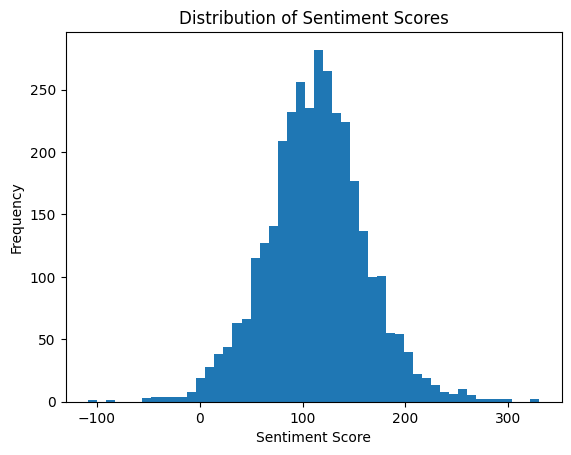

In [45]:
# Ensure 'sentiment_score' is correctly formatted as a tuple
df['sentiment_score_value'] = df['sentiment_score'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

# Plot histogram of sentiment scores
plt.hist(df['sentiment_score_value'], bins=50)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

In [46]:
# Resample sentiment scores to quarterly averages
quarterly_sentiment = df['sentiment_score'].resample('Q').mean()

C:\Users\User\AppData\Local\Temp\ipykernel_13608\3153474309.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sentiment = df['sentiment_score'].resample('Q').mean()


In [47]:
# Create the final DataFrame for quarterly sentiment indices
quarterly_sentiment_df = quarterly_sentiment.reset_index().rename(columns={'sentiment_score': 'quarterly_sentiment_index'})


In [48]:
# Convert 'Date' to show Quarterly format (e.g., 2022Q1)
def convert_date_to_quarter(date):
    return f"{date.year}Q{(date.month - 1) // 3 + 1}"

quarterly_sentiment_df['Quarter'] = quarterly_sentiment_df['Date'].apply(convert_date_to_quarter)


In [49]:
# Reorder columns to have 'Date' as the first column
quarterly_sentiment_df = quarterly_sentiment_df[['Quarter', 'quarterly_sentiment_index']].rename(columns={'Quarter': 'Date'})


In [50]:
# Display the first few rows of the resulting DataFrame
print("\nQuarterly Sentiment Index:")
print(quarterly_sentiment_df.head())


Quarterly Sentiment Index:
     Date  quarterly_sentiment_index
0  2022Q1                 104.752807
1  2022Q2                 107.689848
2  2022Q3                 108.340161
3  2022Q4                 114.046902
4  2023Q1                 114.676678


In [51]:
# Save the results to CSV files with UTF-8 encoding
quarterly_sentiment_df.to_csv('quarterly_sentiment_index.csv', index=False, encoding='utf-8')


PART G: Evaluation of the Performance of the Sentiment Index on its Nowcasting Ability of the BCI and CSI figures (Visual Plot and Regression Output)

PART G(1): Preparing the Data and Plotting the Time Series Plot

In [52]:
# Load MIER BCI and CSI data from Excel
bci_df = pd.read_excel('Data BCI_CSI_2022_2023.xlsx', sheet_name='BCI Formatted ')
csi_df = pd.read_excel('Data BCI_CSI_2022_2023.xlsx', sheet_name='CSI Formatted')


In [53]:
# Merge the sentiment index with BCI and CSI data
merged_df = quarterly_sentiment_df.merge(bci_df, left_on='Date', right_on='Quarter')
merged_df = merged_df.merge(csi_df, left_on='Date', right_on='Quarter', suffixes=('_BCI', '_CSI'))


In [54]:
# Verify the column names in the merged DataFrame
print("Column names in merged_df:", merged_df.columns)


Column names in merged_df: Index(['Date', 'quarterly_sentiment_index', 'Quarter_BCI', 'BCI Values ',
       'Quarter_CSI', 'CSI Values '],
      dtype='object')


In [55]:
# Strip leading and trailing whitespaces from all column names in merged_df
merged_df.columns = merged_df.columns.str.strip()

In [56]:
# Verify the column names in the merged DataFrame after stripping
print("Column names in merged_df after stripping:", merged_df.columns)


Column names in merged_df after stripping: Index(['Date', 'quarterly_sentiment_index', 'Quarter_BCI', 'BCI Values',
       'Quarter_CSI', 'CSI Values'],
      dtype='object')


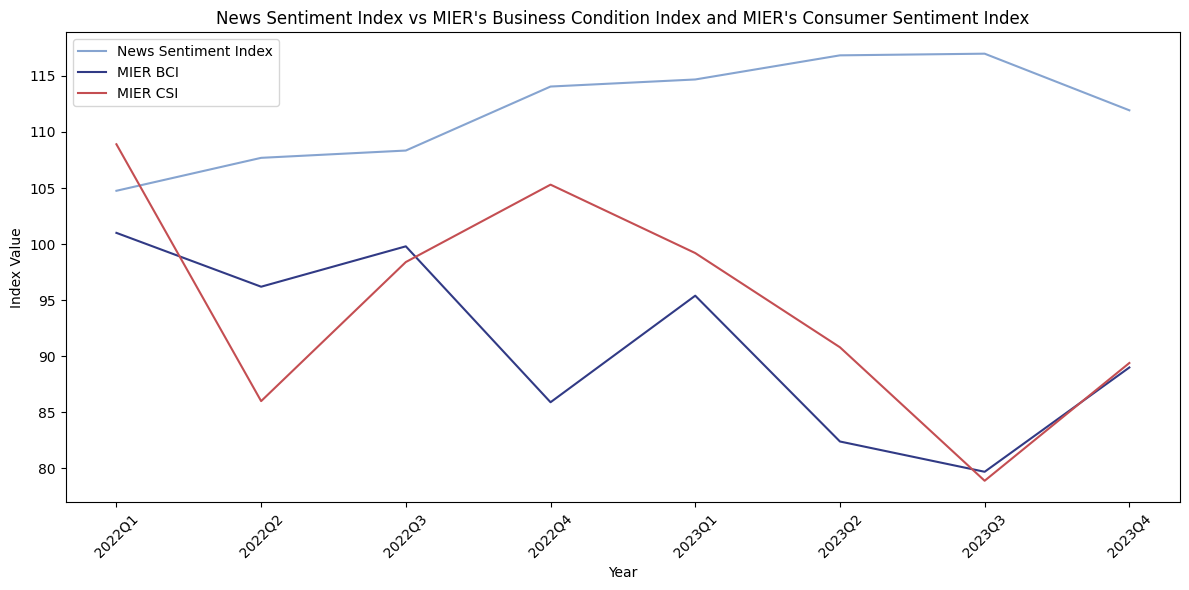

In [57]:
# Plot the time series data
plt.figure(figsize=(12, 6))

plt.plot(merged_df['Date'], merged_df['quarterly_sentiment_index'], label='News Sentiment Index', color='#86A4D0')
plt.plot(merged_df['Date'], merged_df['BCI Values'], label='MIER BCI', color='#313A85')
plt.plot(merged_df['Date'], merged_df['CSI Values'], label='MIER CSI', color='#C44E52')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.title("News Sentiment Index vs MIER's Business Condition Index and MIER's Consumer Sentiment Index")
plt.legend()

# Customize x-axis to show the quarter format
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

PART G(2): Nowcast BCI and CSI values Using the News Sentiment Index

In [58]:
# Sort the merged DataFrame by date
merged_df.sort_values('Date', inplace=True)

In [60]:
# Create lagged variables
merged_df['BCI_Lag'] = merged_df['BCI Values'].shift(1)
merged_df['CSI_Lag'] = merged_df['CSI Values'].shift(1)

In [61]:
# Drop rows with missing values created by lagging
merged_df.dropna(inplace=True)

In [62]:
# Regression analysis for BCI
X_bci = merged_df[['BCI_Lag', 'quarterly_sentiment_index']]
y_bci = merged_df['BCI Values']
X_bci = sm.add_constant(X_bci)  # adding a constant

model_bci = sm.OLS(y_bci, X_bci).fit()
predictions_bci = model_bci.predict(X_bci)

In [63]:
# Print out the statistics
print(model_bci.summary())

                            OLS Regression Results                            
Dep. Variable:             BCI Values   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     4.592
Date:                Sat, 27 Jul 2024   Prob (F-statistic):             0.0921
Time:                        13:20:36   Log-Likelihood:                -19.399
No. Observations:                   7   AIC:                             44.80
Df Residuals:                       4   BIC:                             44.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [64]:
# Regression analysis for CSI
X_csi = merged_df[['CSI_Lag', 'quarterly_sentiment_index']]
y_csi = merged_df['CSI Values']
X_csi = sm.add_constant(X_csi)  # adding a constant

model_csi = sm.OLS(y_csi, X_csi).fit()
predictions_csi = model_csi.predict(X_csi)

In [65]:
# Print out the statistics
print(model_csi.summary())

                            OLS Regression Results                            
Dep. Variable:             CSI Values   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                 -0.454
Method:                 Least Squares   F-statistic:                   0.06367
Date:                Sat, 27 Jul 2024   Prob (F-statistic):              0.939
Time:                        13:25:20   Log-Likelihood:                -24.644
No. Observations:                   7   AIC:                             55.29
Df Residuals:                       4   BIC:                             55.13
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


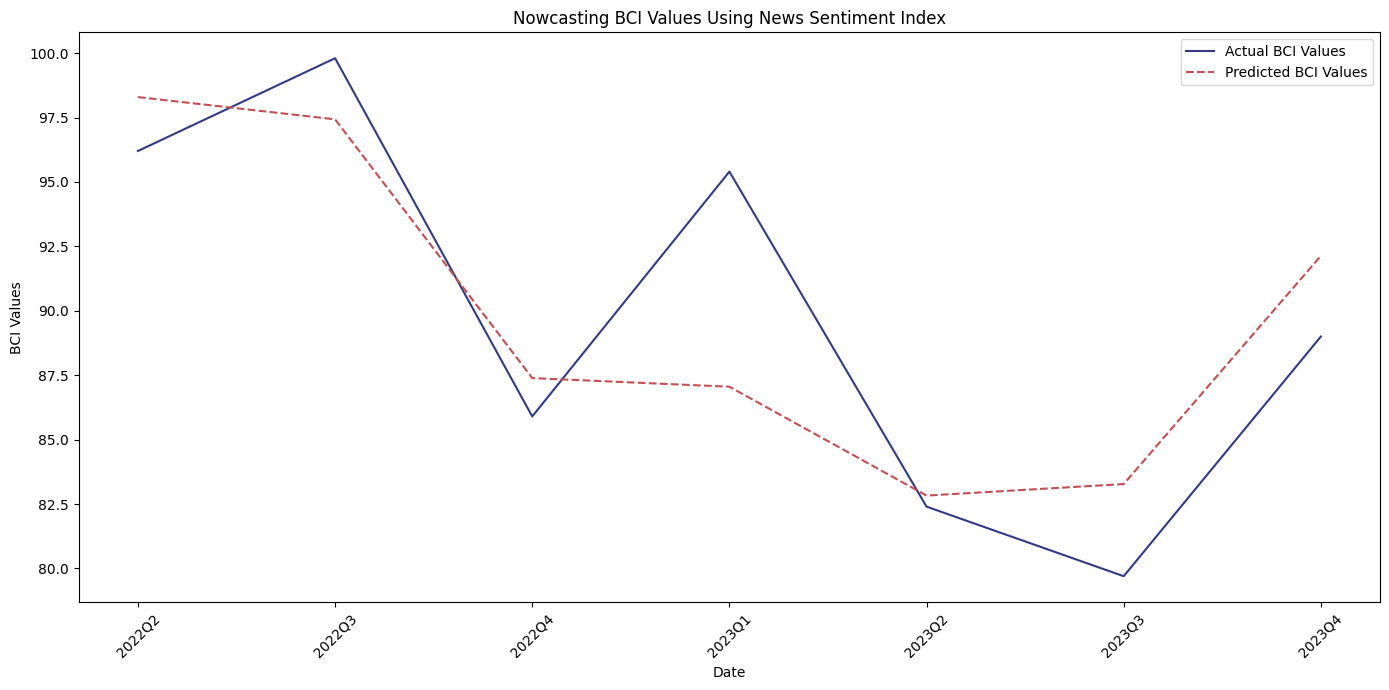

In [66]:
# Plotting actual vs predicted for BCI
plt.figure(figsize=(14, 7))
plt.plot(merged_df['Date'], y_bci, label='Actual BCI Values', color='#313A85')
plt.plot(merged_df['Date'], predictions_bci, label='Predicted BCI Values', color='#C44E52', linestyle='--')
plt.xlabel('Date')
plt.ylabel('BCI Values')
plt.title('Nowcasting BCI Values Using News Sentiment Index')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

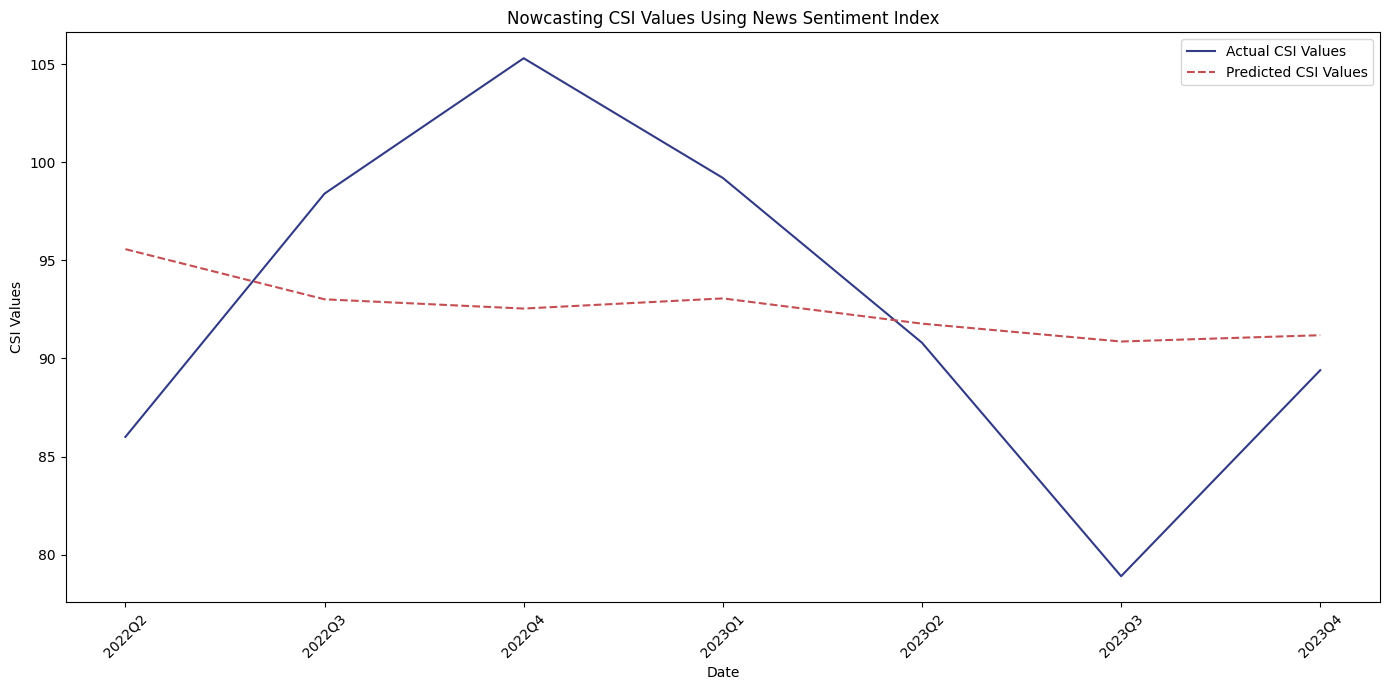

In [67]:
# Plotting actual vs predicted for CSI
plt.figure(figsize=(14, 7))
plt.plot(merged_df['Date'], y_csi, label='Actual CSI Values', color='#313A85')
plt.plot(merged_df['Date'], predictions_csi, label='Predicted CSI Values', color='#C44E52', linestyle='--')
plt.xlabel('Date')
plt.ylabel('CSI Values')
plt.title('Nowcasting CSI Values Using News Sentiment Index')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

For the BCI nowcasting activity, the condition number suggests potential multicollinearity issues, which may need further investigation. 

Check Correlation Matrix (BCI)

In [68]:
# Given that 'merged_df' is the DataFrame containing the predictors and the response variable
correlation_matrix = merged_df[['BCI_Lag', 'quarterly_sentiment_index']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                            BCI_Lag  quarterly_sentiment_index
BCI_Lag                    1.000000                  -0.416616
quarterly_sentiment_index -0.416616                   1.000000


Variance Inflation Factor (VIF) for BCI Data

In [69]:
# Given that 'merged_df' is the DataFrame containing the predictors
X = merged_df[['BCI_Lag', 'quarterly_sentiment_index']]

# Adding a constant term for the intercept
X = sm.add_constant(X)

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                    Variable          VIF
0                      const  1795.654814
1                    BCI_Lag     1.210022
2  quarterly_sentiment_index     1.210022


There is no multicollinearity concern. Since the VIF values for the predictors are low, multicollinearity is not a significant issue in the regression model.

PART H: Evaluation of the Pearson Correlation Between the Macroeconomics Variables and the News Sentiment Index

In [70]:
# Load the quarterly sentiment index data
quarterly_sentiment_df = pd.read_csv('quarterly_sentiment_index.csv')


In [71]:
# Merge the macroeconomic data with the quarterly sentiment index data
merged_data = pd.merge(quarterly_sentiment_df, macro_data, left_on='Date', right_on='Quarter')


In [72]:
# Drop the 'Quarter' column
merged_data.drop('Quarter', axis=1, inplace=True)

In [73]:
# Drop the 'Date' column
numeric_data = merged_data.drop(columns=['Date'])

In [74]:
# Compute Pearson correlation coefficients
correlation_matrix = numeric_data.corr()

In [75]:
# Display the correlation matrix
print("Pearson Correlation Matrix:")
print(correlation_matrix)

Pearson Correlation Matrix:
                           quarterly_sentiment_index   Imports   Exports  \
quarterly_sentiment_index                   1.000000 -0.889319 -0.817534   
Imports                                    -0.889319  1.000000  0.980870   
Exports                                    -0.817534  0.980870  1.000000   
GDP                                        -0.494618  0.775915  0.853863   
Private Consumption                        -0.532231  0.776856  0.780318   
Private Investment                          0.052724  0.362085  0.479134   

                                GDP  Private Consumption  Private Investment  
quarterly_sentiment_index -0.494618            -0.532231            0.052724  
Imports                    0.775915             0.776856            0.362085  
Exports                    0.853863             0.780318            0.479134  
GDP                        1.000000             0.826276            0.790622  
Private Consumption        0.826276         

In [76]:
# Extract the correlations with the quarterly sentiment index
correlation_with_sentiment = correlation_matrix['quarterly_sentiment_index']
print("\nPearson Correlation Coefficients with Quarterly Sentiment Index:")
print(correlation_with_sentiment)


Pearson Correlation Coefficients with Quarterly Sentiment Index:
quarterly_sentiment_index    1.000000
Imports                     -0.889319
Exports                     -0.817534
GDP                         -0.494618
Private Consumption         -0.532231
Private Investment           0.052724
Name: quarterly_sentiment_index, dtype: float64


PART I: Modelling Process for the Forecasting Activity of the 5 Target Variables Using Machine Learning Models 

PART I(1): Modelling Process Without Hyperparameter Tuning and Performance Evaluation

In [77]:
# Define functions to compute RMSE and MAE
def compute_rmse(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

def compute_mae(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    return mae

In [78]:
# Initialize variables
window_size = 4  # 4 quarters as training period
horizons = [1, 2, 3]  # Forecast horizons
macro_vars = ['Imports', 'Exports', 'GDP', 'Private Consumption', 'Private Investment']


In [79]:
# Prepare the data 
data = merged_data.copy()

In [80]:
# Ensure 'Date' column is excluded from features
features = data.columns.difference(['Date'])

In [81]:
# Initialize dictionaries to store results
models = {
    'OLS-AR(1)': LinearRegression(),
    'LASSO': Lasso(),
    'Ridge': Ridge(),
    'SVR': SVR(),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

results = {model_name: {var: {horizon: [] for horizon in horizons} for var in macro_vars} for model_name in models}
rmse_ratios = {model_name: {var: {horizon: [] for horizon in horizons} for var in macro_vars} for model_name in models if model_name != 'OLS-AR(1)'}
mae_ratios = {model_name: {var: {horizon: [] for horizon in horizons} for var in macro_vars} for model_name in models if model_name != 'OLS-AR(1)'}


In [82]:
# Rolling window approach
for var in macro_vars:
    for horizon in horizons:
        for start in range(0, len(data) - window_size - horizon + 1):
            end = start + window_size
            train_window = data.iloc[start:end]
            test_window = data.iloc[end:end+horizon]

            X_train = train_window[features].drop(columns=[var])
            y_train = train_window[var]
            X_test = test_window[features].drop(columns=[var])
            y_test = test_window[var]

            # Train OLS-AR(1) as benchmark
            ols_ar1 = LinearRegression()
            ols_ar1.fit(X_train, y_train)
            y_pred_ols = ols_ar1.predict(X_test)
            rmse_ols = compute_rmse(y_test, y_pred_ols)
            mae_ols = compute_mae(y_test, y_pred_ols)

            for model_name, model in models.items():
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                rmse = compute_rmse(y_test, y_pred)
                mae = compute_mae(y_test, y_pred)

                # Store results
                results[model_name][var][horizon].append((rmse, mae))
                if model_name != 'OLS-AR(1)':
                    rmse_ratios[model_name][var][horizon].append(rmse / rmse_ols)
                    mae_ratios[model_name][var][horizon].append(mae / mae_ols)


In [83]:
# Function to safely calculate the mean of non-empty lists
def safe_mean(lst):
    return np.mean(lst) if lst else float('nan')

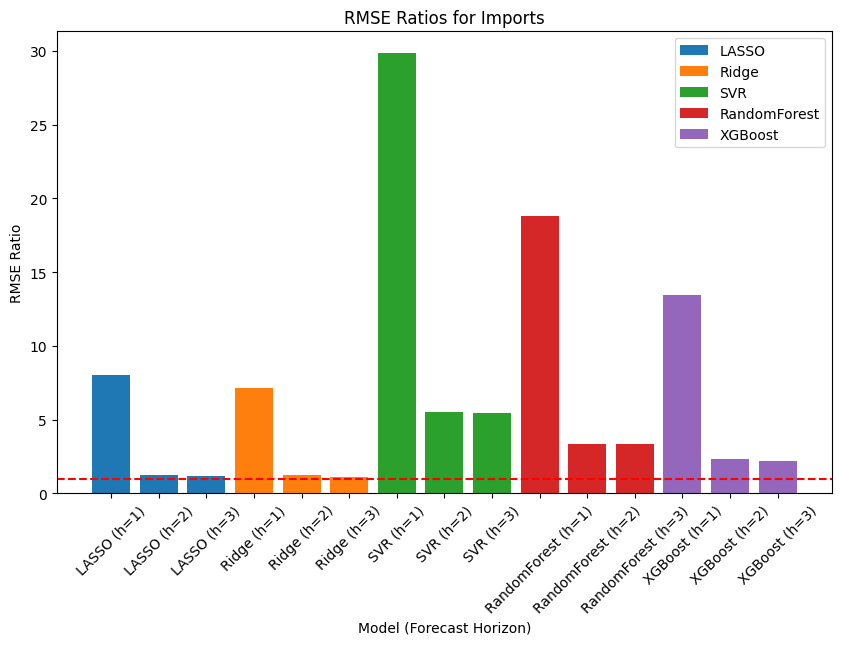

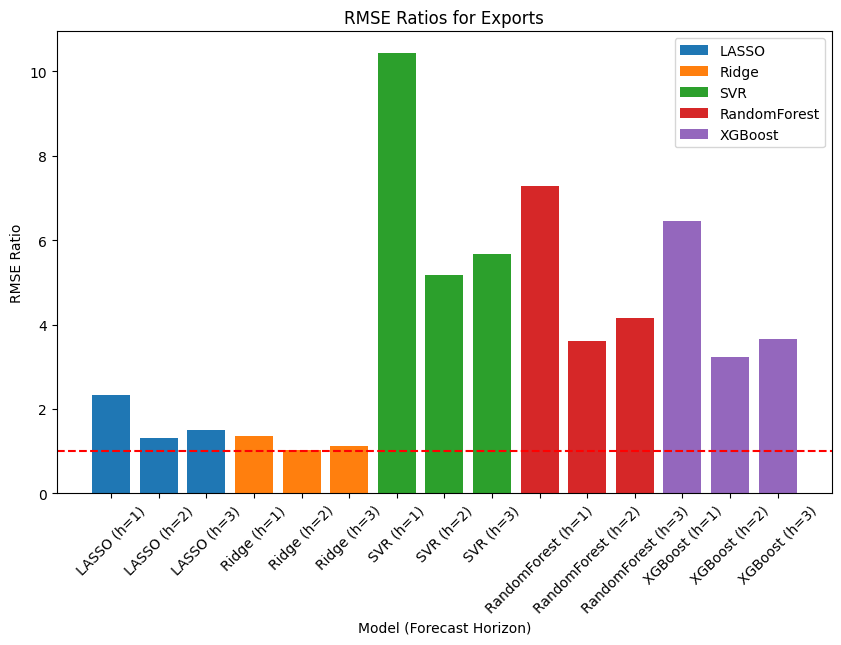

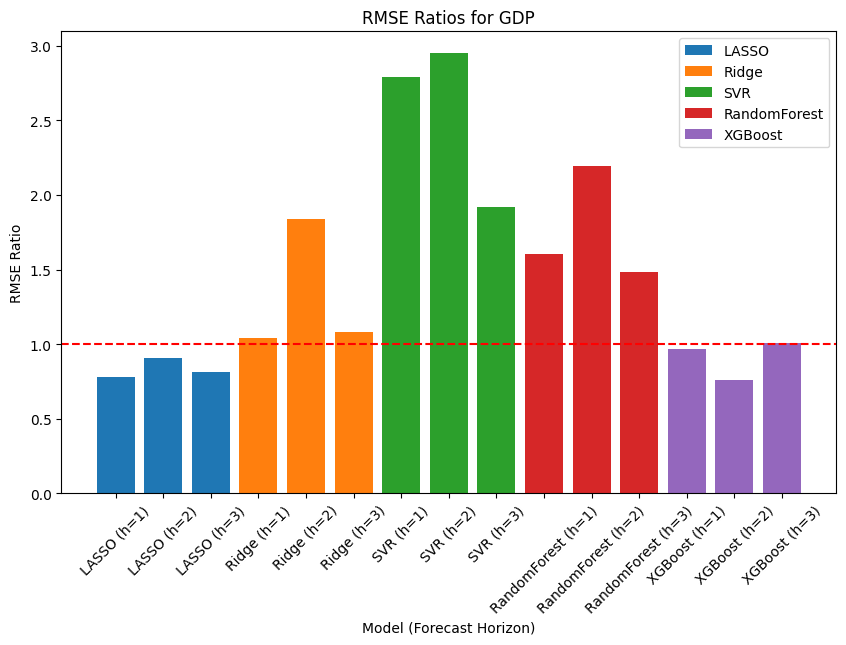

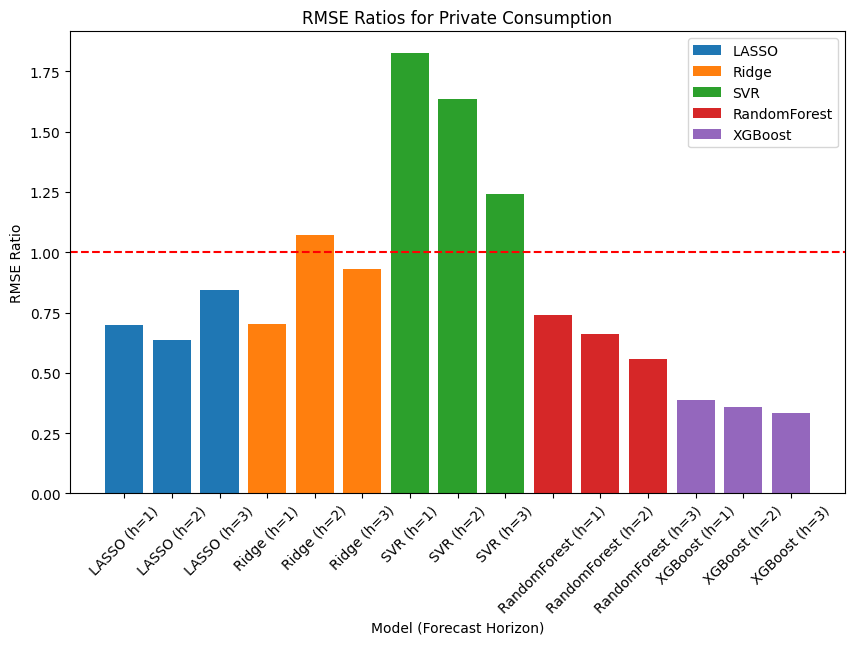

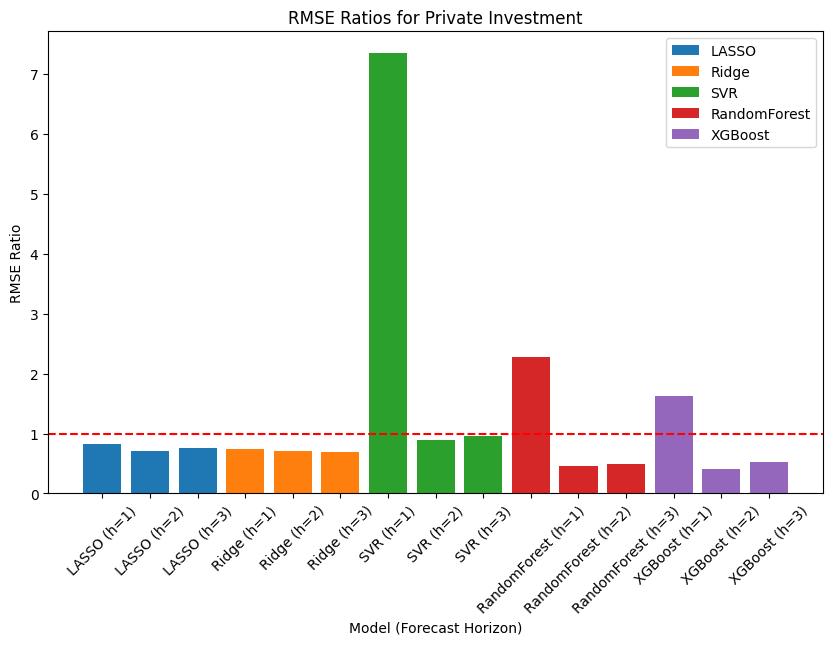

In [84]:
# Plotting RMSE ratios for each macroeconomic variable
for var in macro_vars:
    plt.figure(figsize=(10, 6))
    for model_name, horizon_dict in rmse_ratios.items():
        if model_name != 'OLS-AR(1)':
            horizons = list(horizon_dict[var].keys())
            ratios = [safe_mean(horizon_dict[var][h]) for h in horizons]
            plt.bar([f'{model_name} (h={h})' for h in horizons], ratios, label=model_name)
    plt.axhline(y=1, color='r', linestyle='--')
    plt.title(f'RMSE Ratios for {var}')
    plt.xlabel('Model (Forecast Horizon)')
    plt.ylabel('RMSE Ratio')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


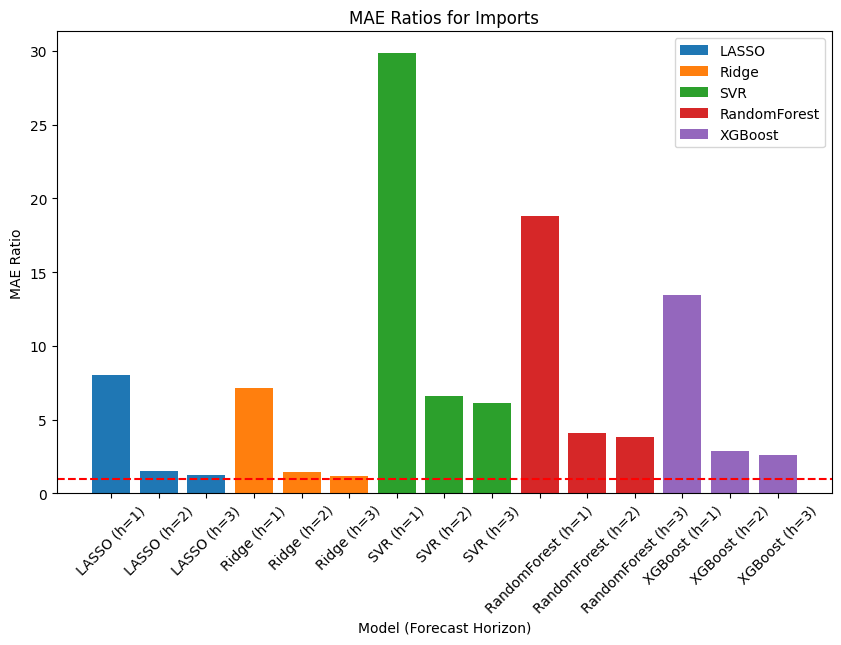

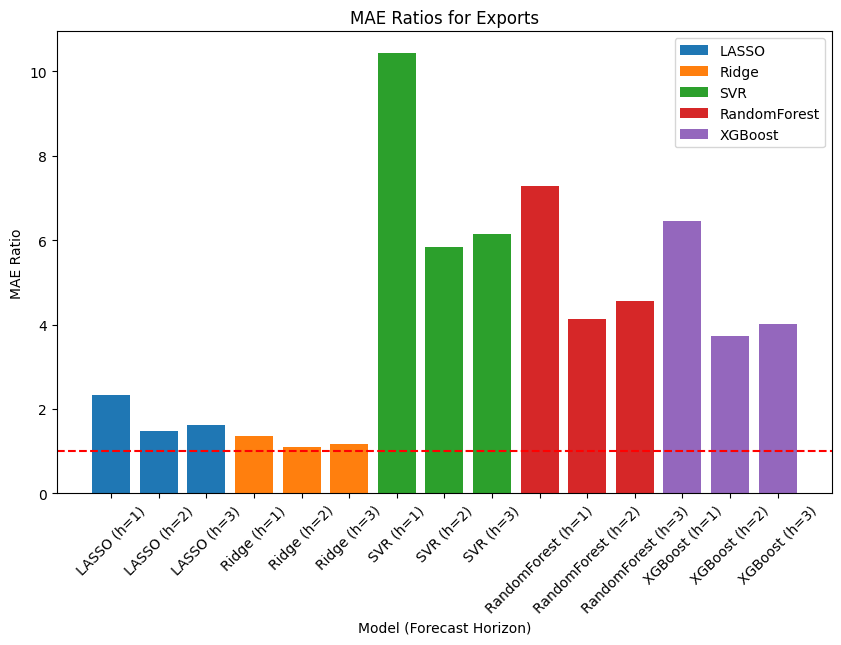

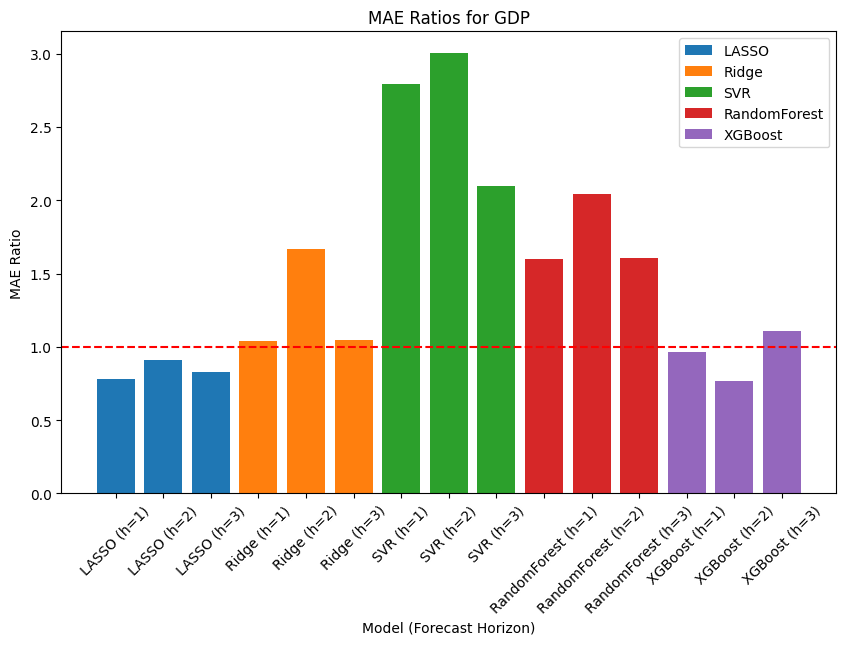

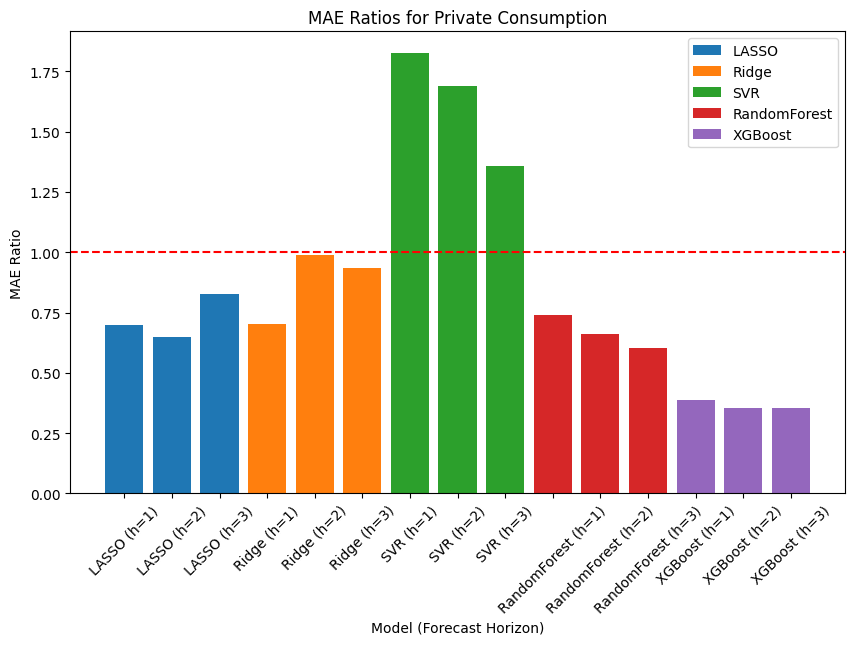

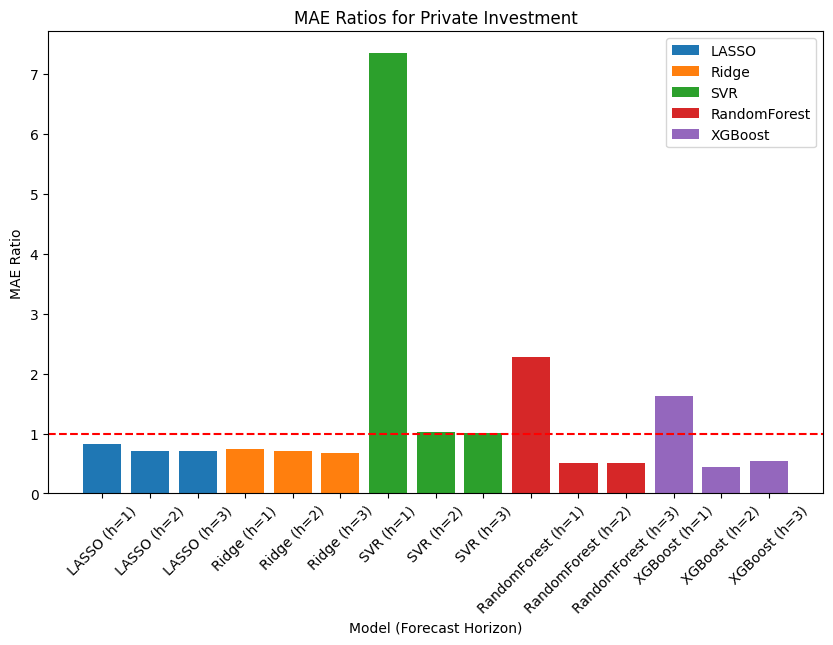

In [85]:
# Plotting MAE ratios for each macroeconomic variable
for var in macro_vars:
    plt.figure(figsize=(10, 6))
    for model_name, horizon_dict in mae_ratios.items():
        if model_name != 'OLS-AR(1)':
            horizons = list(horizon_dict[var].keys())
            ratios = [safe_mean(horizon_dict[var][h]) for h in horizons]
            plt.bar([f'{model_name} (h={h})' for h in horizons], ratios, label=model_name)
    plt.axhline(y=1, color='r', linestyle='--')
    plt.title(f'MAE Ratios for {var}')
    plt.xlabel('Model (Forecast Horizon)')
    plt.ylabel('MAE Ratio')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

In [86]:
# Display results
for var in macro_vars:
    print(f'\nVariable: {var}')
    for model_name, horizon_dict in rmse_ratios.items():
        if model_name != 'OLS-AR(1)':
            print(f'\n{model_name}:')
            for horizon in horizon_dict[var]:
                rmse_ratio = safe_mean(rmse_ratios[model_name][var][horizon])
                mae_ratio = safe_mean(mae_ratios[model_name][var][horizon])
                print(f'  Horizon {horizon}: RMSE Ratio={rmse_ratio}, MAE Ratio={mae_ratio}')



Variable: Imports

LASSO:
  Horizon 1: RMSE Ratio=8.062281660686319, MAE Ratio=8.062281660686319
  Horizon 2: RMSE Ratio=1.2214297024700742, MAE Ratio=1.5045688467663425
  Horizon 3: RMSE Ratio=1.1552946454941775, MAE Ratio=1.2619297724130785

Ridge:
  Horizon 1: RMSE Ratio=7.153449142207594, MAE Ratio=7.153449142207594
  Horizon 2: RMSE Ratio=1.2686993414588443, MAE Ratio=1.4644321360470245
  Horizon 3: RMSE Ratio=1.0977836900430233, MAE Ratio=1.194255121865858

SVR:
  Horizon 1: RMSE Ratio=29.8218896159722, MAE Ratio=29.8218896159722
  Horizon 2: RMSE Ratio=5.52157593663728, MAE Ratio=6.579982453805068
  Horizon 3: RMSE Ratio=5.460134116844499, MAE Ratio=6.134595930037081

RandomForest:
  Horizon 1: RMSE Ratio=18.831421759675397, MAE Ratio=18.831421759675397
  Horizon 2: RMSE Ratio=3.3507534558393375, MAE Ratio=4.111016206080653
  Horizon 3: RMSE Ratio=3.329957221321915, MAE Ratio=3.8111067768318594

XGBoost:
  Horizon 1: RMSE Ratio=13.440747412134172, MAE Ratio=13.440747412134172
 

PART I(2): Modelling Process With Hyperparameter Tuning and Performance Evaluation

In [87]:
# Define a function to compute RMSE and MAE
def compute_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mae

In [88]:
# Initialize variables
window_size_tuned = 4  # 4 quarters as training period
horizons_tuned = [1, 2, 3]  # Forecast horizons
macro_vars_tuned = ['Imports', 'Exports', 'GDP', 'Private Consumption', 'Private Investment']


In [89]:
# Prepare the data
data_tuned = merged_data.copy()

In [90]:
# Ensure 'Date' column is excluded from features
features_tuned = data_tuned.columns.difference(['Date'])

In [91]:
# Define parameter grids for each model
param_grids = {
    'LASSO': {'lasso__alpha': [0.1, 0.5, 1.0, 5.0, 10.0]},
    'Ridge': {'ridge__alpha': [0.1, 0.5, 1.0, 5.0, 10.0]},
    'SVR': {'svr__C': [0.1, 1.0, 10.0], 'svr__epsilon': [0.1, 0.2, 0.5], 'svr__kernel': ['linear', 'rbf']},
    'RandomForest': {'randomforestregressor__n_estimators': [100, 200], 'randomforestregressor__max_depth': [None, 10, 20], 'randomforestregressor__min_samples_split': [2, 5]},
    'XGBoost': {'xgbregressor__n_estimators': [100, 200], 'xgbregressor__max_depth': [3, 6, 9], 'xgbregressor__learning_rate': [0.01, 0.1, 0.2]}
}

In [92]:
# Initialize models with pipelines
models = {
    'LASSO': make_pipeline(StandardScaler(), Lasso(max_iter=10000)),
    'Ridge': make_pipeline(StandardScaler(), Ridge(max_iter=10000)),
    'SVR': make_pipeline(StandardScaler(), SVR()),
    'RandomForest': make_pipeline(StandardScaler(), RandomForestRegressor()),
    'XGBoost': make_pipeline(StandardScaler(), XGBRegressor())
}

In [93]:
# Initialize dictionaries to store results
best_models_tuned = {}
best_params_tuned = {}
for var in macro_vars_tuned:
    best_models_tuned[var] = {}
    best_params_tuned[var] = {}
    for model_name, model in models.items():
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(data_tuned[features_tuned], data_tuned[var])
        best_models_tuned[var][model_name] = grid_search.best_estimator_
        best_params_tuned[var][model_name] = grid_search.best_params_


In [94]:
# Now use best_models for the rolling window approach
results_tuned = {model_name: {var: {horizon: [] for horizon in horizons_tuned} for var in macro_vars_tuned} for model_name in models}
metrics_tuned = {model_name: {var: {horizon: {'RMSE': [], 'MAE': []} for horizon in horizons_tuned} for var in macro_vars_tuned} for model_name in models}
rmse_ratios_tuned = {model_name: {var: {horizon: [] for horizon in horizons_tuned} for var in macro_vars_tuned} for model_name in models if model_name != 'OLS-AR(1)'}
mae_ratios_tuned = {model_name: {var: {horizon: [] for horizon in horizons_tuned} for var in macro_vars_tuned} for model_name in models if model_name != 'OLS-AR(1)'}


In [95]:
# Rolling window approach
for var in macro_vars_tuned:
    for horizon in horizons_tuned:
        for start in range(0, len(data_tuned) - window_size_tuned - horizon + 1):
            end = start + window_size_tuned
            train_window = data_tuned.iloc[start:end]
            test_window = data_tuned.iloc[end:end + horizon]

            X_train = train_window[features_tuned].drop(columns=[var])
            y_train = train_window[var]
            X_test = test_window[features_tuned].drop(columns=[var])
            y_test = test_window[var]

            # Train OLS-AR(1) as benchmark
            ols_ar1 = LinearRegression()
            ols_ar1.fit(X_train, y_train)
            y_pred_ols = ols_ar1.predict(X_test)
            rmse_ols, mae_ols = compute_metrics(y_test, y_pred_ols)

            for model_name, model in best_models_tuned[var].items():
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                rmse, mae = compute_metrics(y_test, y_pred)

                # Store results
                results_tuned[model_name][var][horizon].append(rmse)
                metrics_tuned[model_name][var][horizon]['RMSE'].append(rmse)
                metrics_tuned[model_name][var][horizon]['MAE'].append(mae)
                if model_name != 'OLS-AR(1)':
                    rmse_ratios_tuned[model_name][var][horizon].append(rmse / rmse_ols)
                    mae_ratios_tuned[model_name][var][horizon].append(mae / mae_ols)
    

In [96]:
# Check for empty lists
for model_name, var_dict in rmse_ratios_tuned.items():
    for var, horizon_dict in var_dict.items():
        for horizon, ratios in horizon_dict.items():
            if not ratios:
                print(f'Empty list found: Model={model_name}, Variable={var}, Horizon={horizon}')


In [97]:
# Function to safely calculate the mean of non-empty lists
def safe_mean(lst):
    return np.mean(lst) if lst else float('nan')

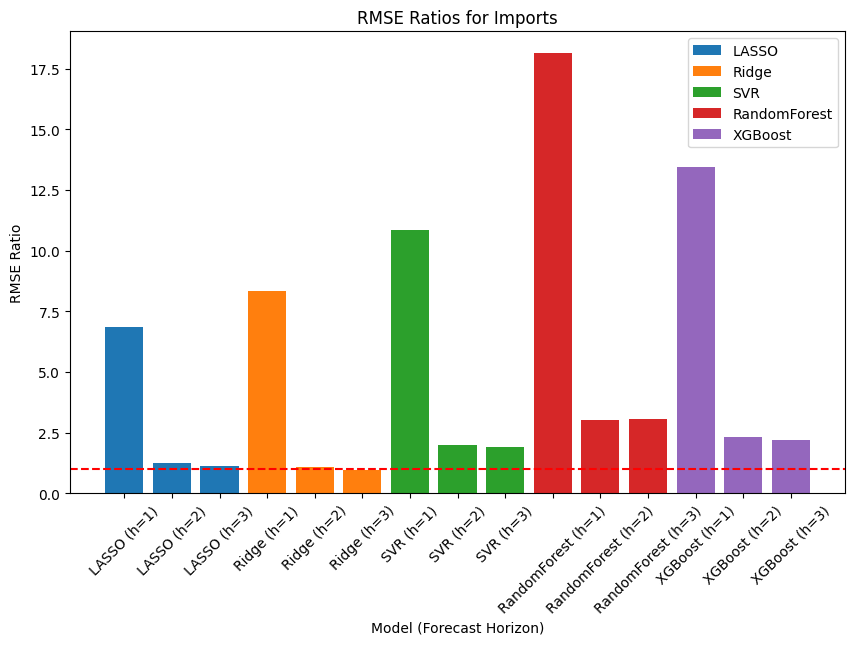

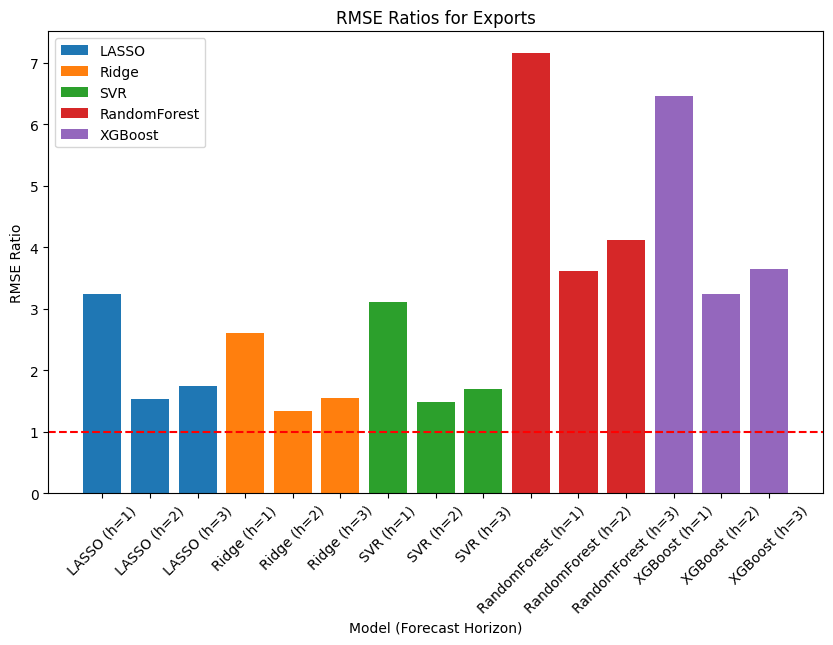

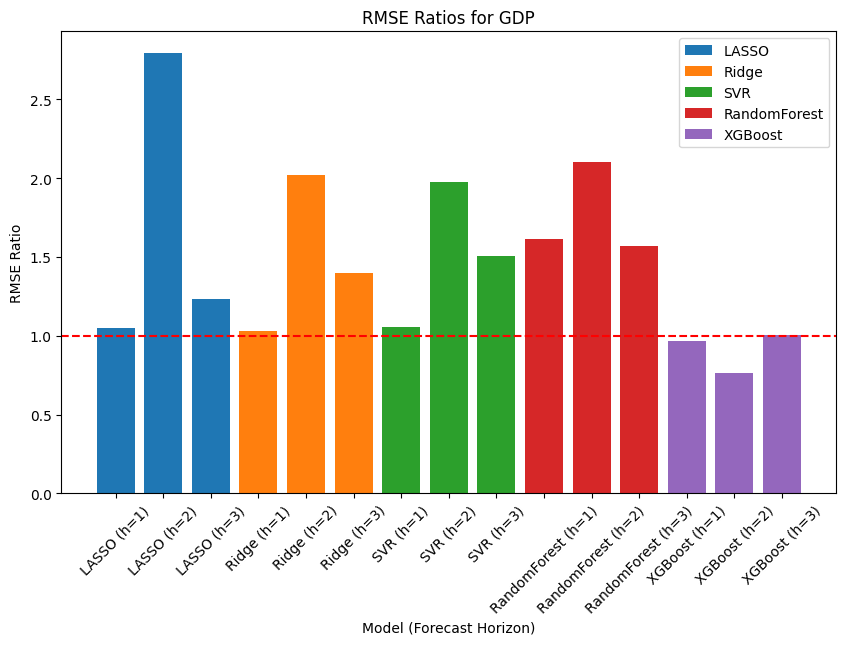

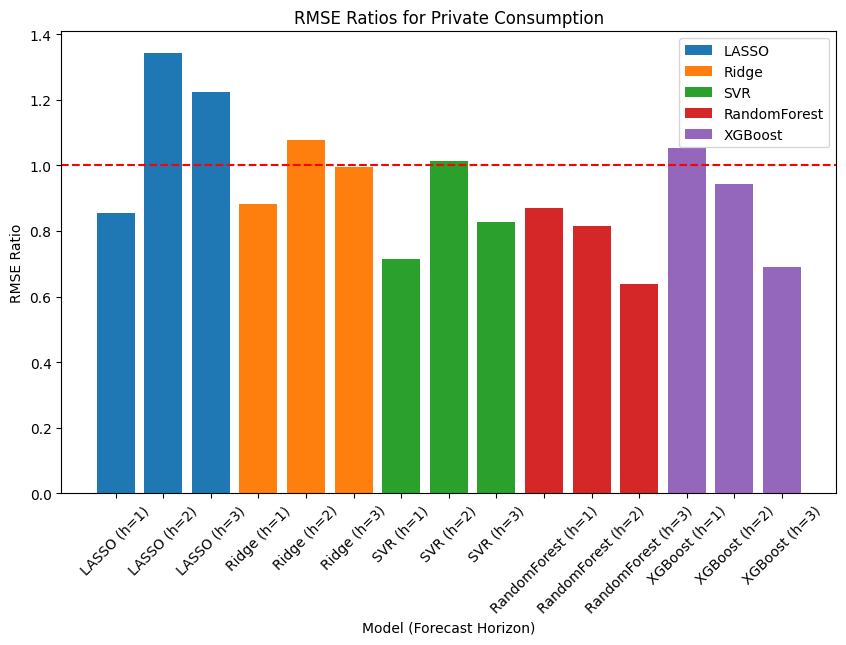

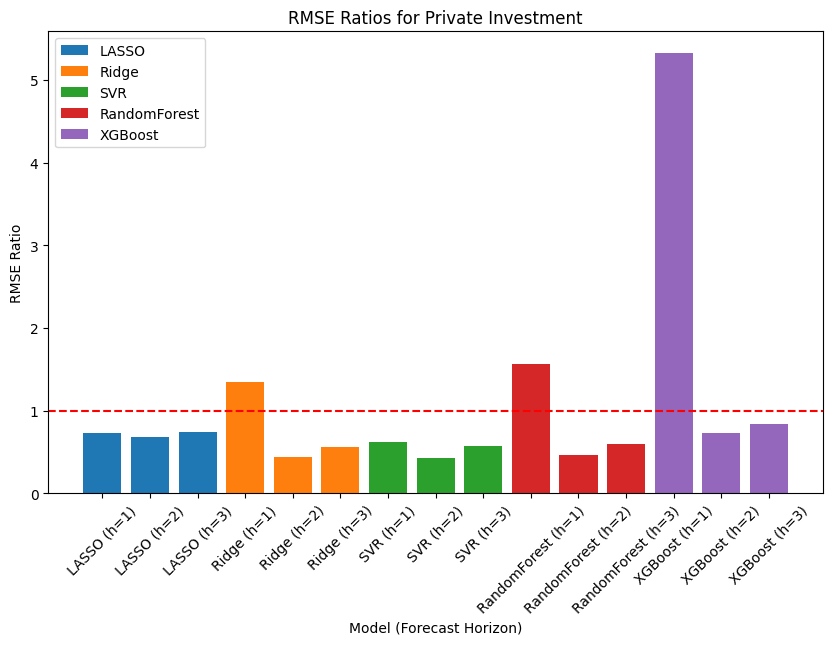

In [98]:
# Plotting RMSE ratios for each macroeconomic variable
for var in macro_vars_tuned:
    plt.figure(figsize=(10, 6))
    for model_name, horizon_dict in rmse_ratios_tuned.items():
        if model_name != 'OLS-AR(1)':
            horizons = list(horizon_dict[var].keys())
            ratios = [safe_mean(horizon_dict[var][h]) for h in horizons]
            plt.bar([f'{model_name} (h={h})' for h in horizons], ratios, label=model_name)
    plt.axhline(y=1, color='r', linestyle='--')
    plt.title(f'RMSE Ratios for {var}')
    plt.xlabel('Model (Forecast Horizon)')
    plt.ylabel('RMSE Ratio')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

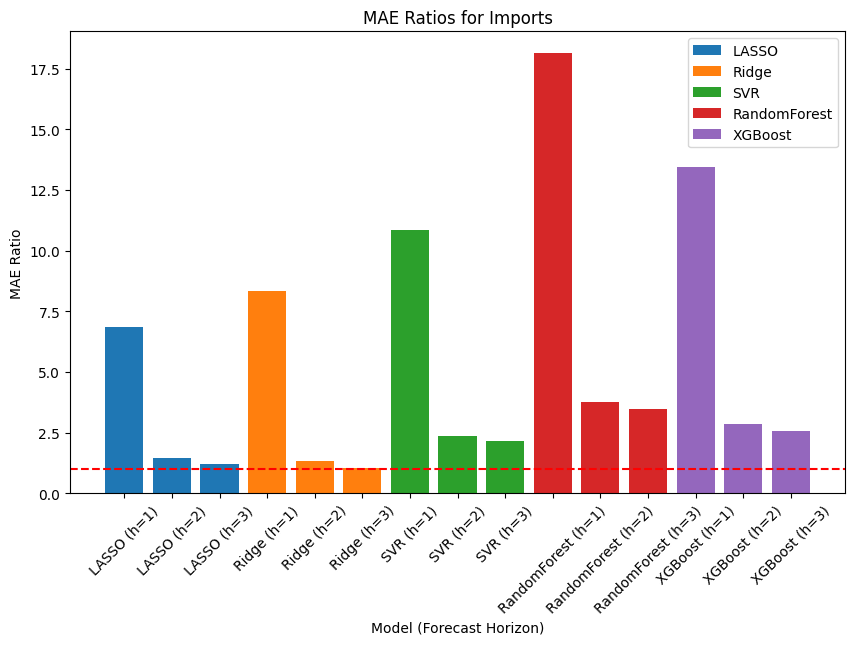

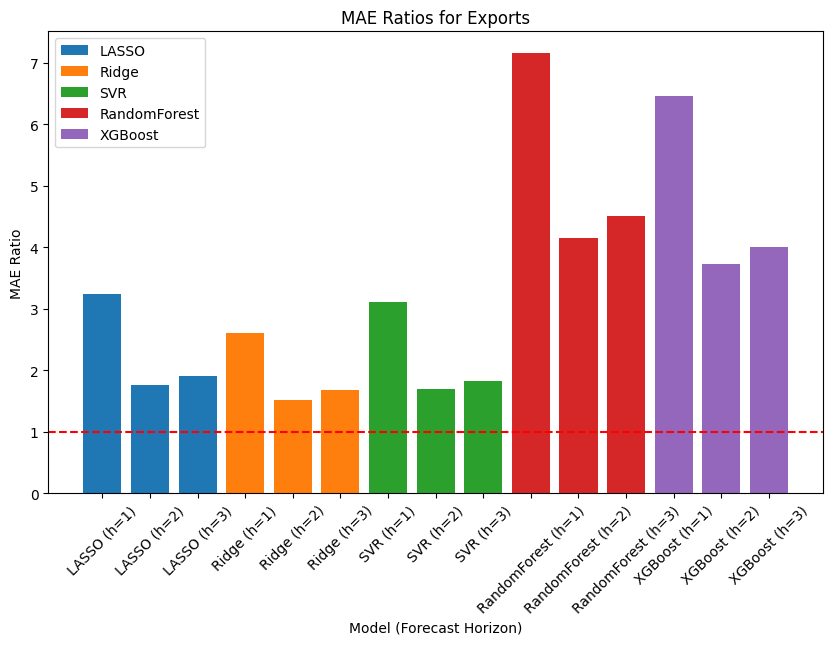

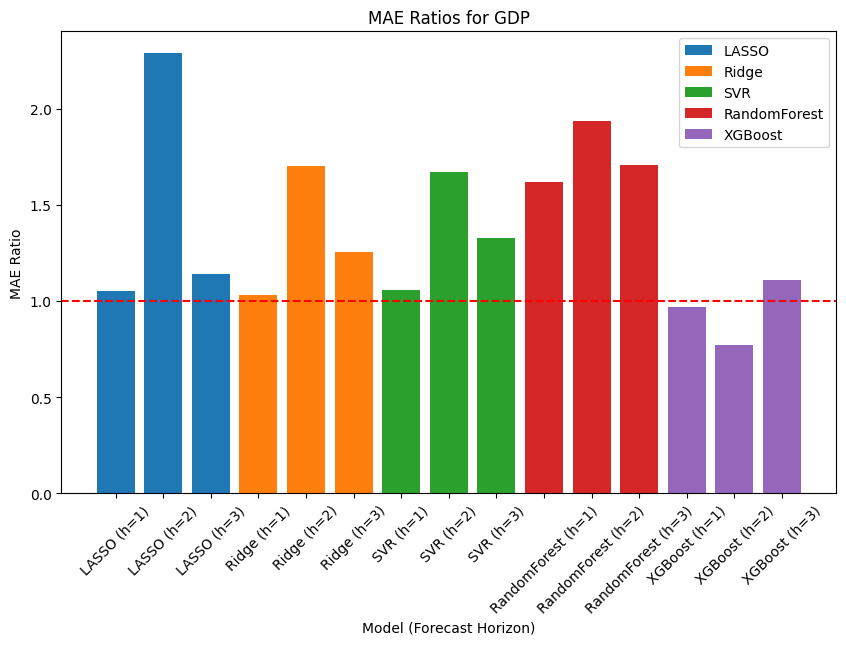

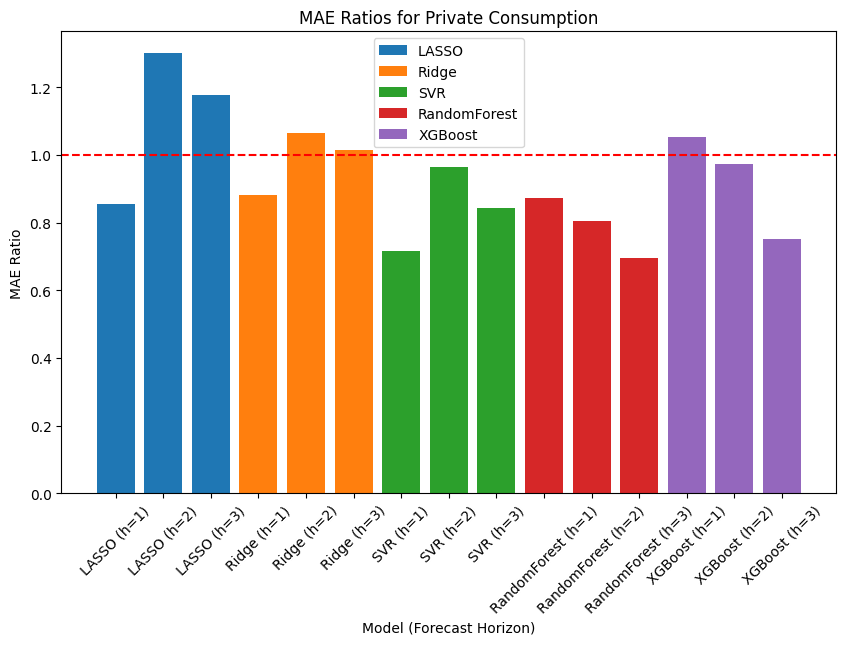

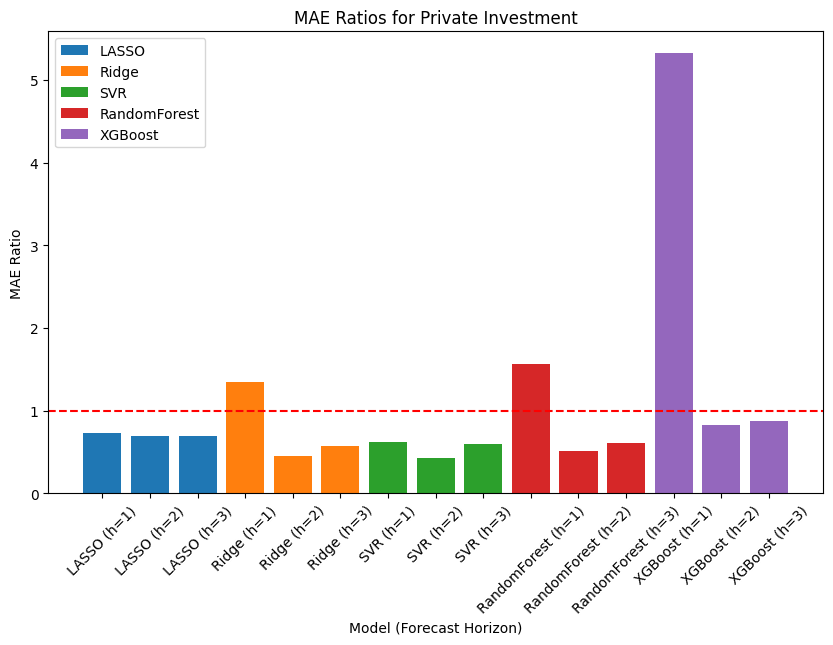

In [99]:
# Plotting MAE ratios for each macroeconomic variable
for var in macro_vars_tuned:
    plt.figure(figsize=(10, 6))
    for model_name, horizon_dict in mae_ratios_tuned.items():
        if model_name != 'OLS-AR(1)':
            horizons = list(horizon_dict[var].keys())
            ratios = [safe_mean(horizon_dict[var][h]) for h in horizons]
            plt.bar([f'{model_name} (h={h})' for h in horizons], ratios, label=model_name)
    plt.axhline(y=1, color='r', linestyle='--')
    plt.title(f'MAE Ratios for {var}')
    plt.xlabel('Model (Forecast Horizon)')
    plt.ylabel('MAE Ratio')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

In [100]:
# Display results for RMSE and MAE ratios
for var in macro_vars_tuned:
    print(f'\nVariable: {var}')
    for model_name in rmse_ratios_tuned:
        print(f'\n{model_name}:')
        for horizon in horizons_tuned:
            avg_rmse_ratio = safe_mean(rmse_ratios_tuned[model_name][var][horizon])
            avg_mae_ratio = safe_mean(mae_ratios_tuned[model_name][var][horizon])
            print(f'  Horizon {horizon}: RMSE Ratio={avg_rmse_ratio}, MAE Ratio={avg_mae_ratio}')



Variable: Imports

LASSO:
  Horizon 1: RMSE Ratio=6.873486295800818, MAE Ratio=6.873486295800818
  Horizon 2: RMSE Ratio=1.273217497618627, MAE Ratio=1.4626844635699217
  Horizon 3: RMSE Ratio=1.12633602869413, MAE Ratio=1.232514069431971

Ridge:
  Horizon 1: RMSE Ratio=8.33135890724605, MAE Ratio=8.33135890724605
  Horizon 2: RMSE Ratio=1.0716518638793118, MAE Ratio=1.3349344316623954
  Horizon 3: RMSE Ratio=0.9516190960563062, MAE Ratio=1.066548191505463

SVR:
  Horizon 1: RMSE Ratio=10.872780949455754, MAE Ratio=10.872780949455754
  Horizon 2: RMSE Ratio=1.9915136631597707, MAE Ratio=2.3826152697348273
  Horizon 3: RMSE Ratio=1.9323983219473573, MAE Ratio=2.165580458454172

RandomForest:
  Horizon 1: RMSE Ratio=18.129263801510366, MAE Ratio=18.129263801510366
  Horizon 2: RMSE Ratio=3.037750085120839, MAE Ratio=3.778045674231457
  Horizon 3: RMSE Ratio=3.072579553262521, MAE Ratio=3.498548729693878

XGBoost:
  Horizon 1: RMSE Ratio=13.44083782690895, MAE Ratio=13.44083782690895
  H

In [101]:
# Display the best parameters identified for each model
print("\nBest parameters for each model and variable:")
for var, model_params in best_params_tuned.items():
    print(f'\nVariable: {var}')
    for model_name, params in model_params.items():
        print(f'{model_name}: {params}')


Best parameters for each model and variable:

Variable: Imports
LASSO: {'lasso__alpha': 0.1}
Ridge: {'ridge__alpha': 0.5}
SVR: {'svr__C': 1.0, 'svr__epsilon': 0.5, 'svr__kernel': 'linear'}
RandomForest: {'randomforestregressor__max_depth': 10, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 100}
XGBoost: {'xgbregressor__learning_rate': 0.2, 'xgbregressor__max_depth': 6, 'xgbregressor__n_estimators': 200}

Variable: Exports
LASSO: {'lasso__alpha': 0.1}
Ridge: {'ridge__alpha': 0.1}
SVR: {'svr__C': 10.0, 'svr__epsilon': 0.5, 'svr__kernel': 'linear'}
RandomForest: {'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 200}
XGBoost: {'xgbregressor__learning_rate': 0.2, 'xgbregressor__max_depth': 6, 'xgbregressor__n_estimators': 200}

Variable: GDP
LASSO: {'lasso__alpha': 0.1}
Ridge: {'ridge__alpha': 0.1}
SVR: {'svr__C': 10.0, 'svr__epsilon': 0.2, 'svr__kernel': 'linear'}
RandomFo